In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from functools import partial, reduce
from statistics import mode, mean, stdev
from operator import itemgetter, eq, sub
from math import sqrt

In [16]:
student=pd.read_csv("C:\\Users\\Siddhisa\\Documents\\studentdata.csv")  

In [17]:
student.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [18]:
student.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [19]:
#look for missing values
student.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [20]:
student.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [21]:
student.shape

(1000, 8)

In [22]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#we are comparing the categories with marks so see how the marks are affected by various reasons

In [23]:
student.groupby(by='gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [25]:
student.groupby(by='race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [26]:
student.groupby(by='parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [27]:
student.groupby(by='test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [40]:
student.groupby(by='lunch').mean()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
lunch,,,,,,,
1,1.467606,3.101408,3.470423,1.630986,58.921127,64.653521,63.022535
2,1.489922,3.213953,3.494574,1.648062,70.034109,71.654264,70.823256


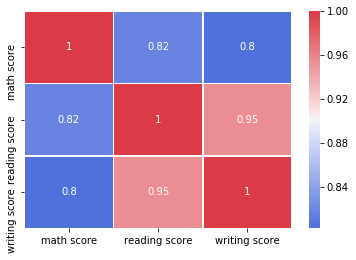

In [30]:
cmap = sns.diverging_palette(260, 10, as_cmap=True) 
sns.heatmap(student.corr(), cmap=cmap, linewidths=.5, annot=True)

In [32]:
def to_categorical(student, value):
    categories = list(pd.Categorical(student).categories)
    return categories.index(value) + 1

columns = ["lunch", "race/ethnicity", "gender", "parental level of education", "test preparation course"]
for name in columns:
    student[name] = student[name].apply(partial(to_categorical, student[name]))

In [33]:
student.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,2,2,2,72,72,74
1,1,3,5,2,1,69,90,88
2,1,2,4,2,2,90,95,93
3,2,1,1,1,2,47,57,44
4,2,3,5,2,2,76,78,75
5,1,2,1,2,2,71,83,78
6,1,2,5,2,1,88,95,92
7,2,2,5,1,2,40,43,39
8,2,4,3,1,1,64,64,67
9,1,2,3,1,2,38,60,50


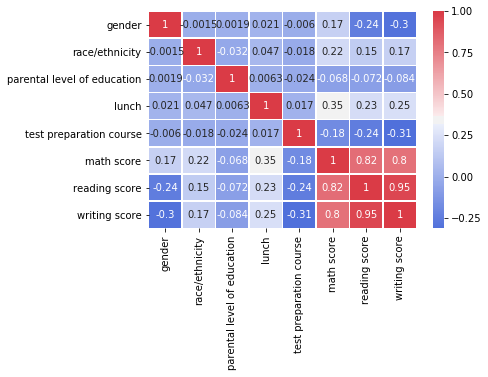

In [34]:
cmap = sns.diverging_palette(260, 10, as_cmap=True) 
sns.heatmap(student.corr(), cmap=cmap, linewidths=.5, annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

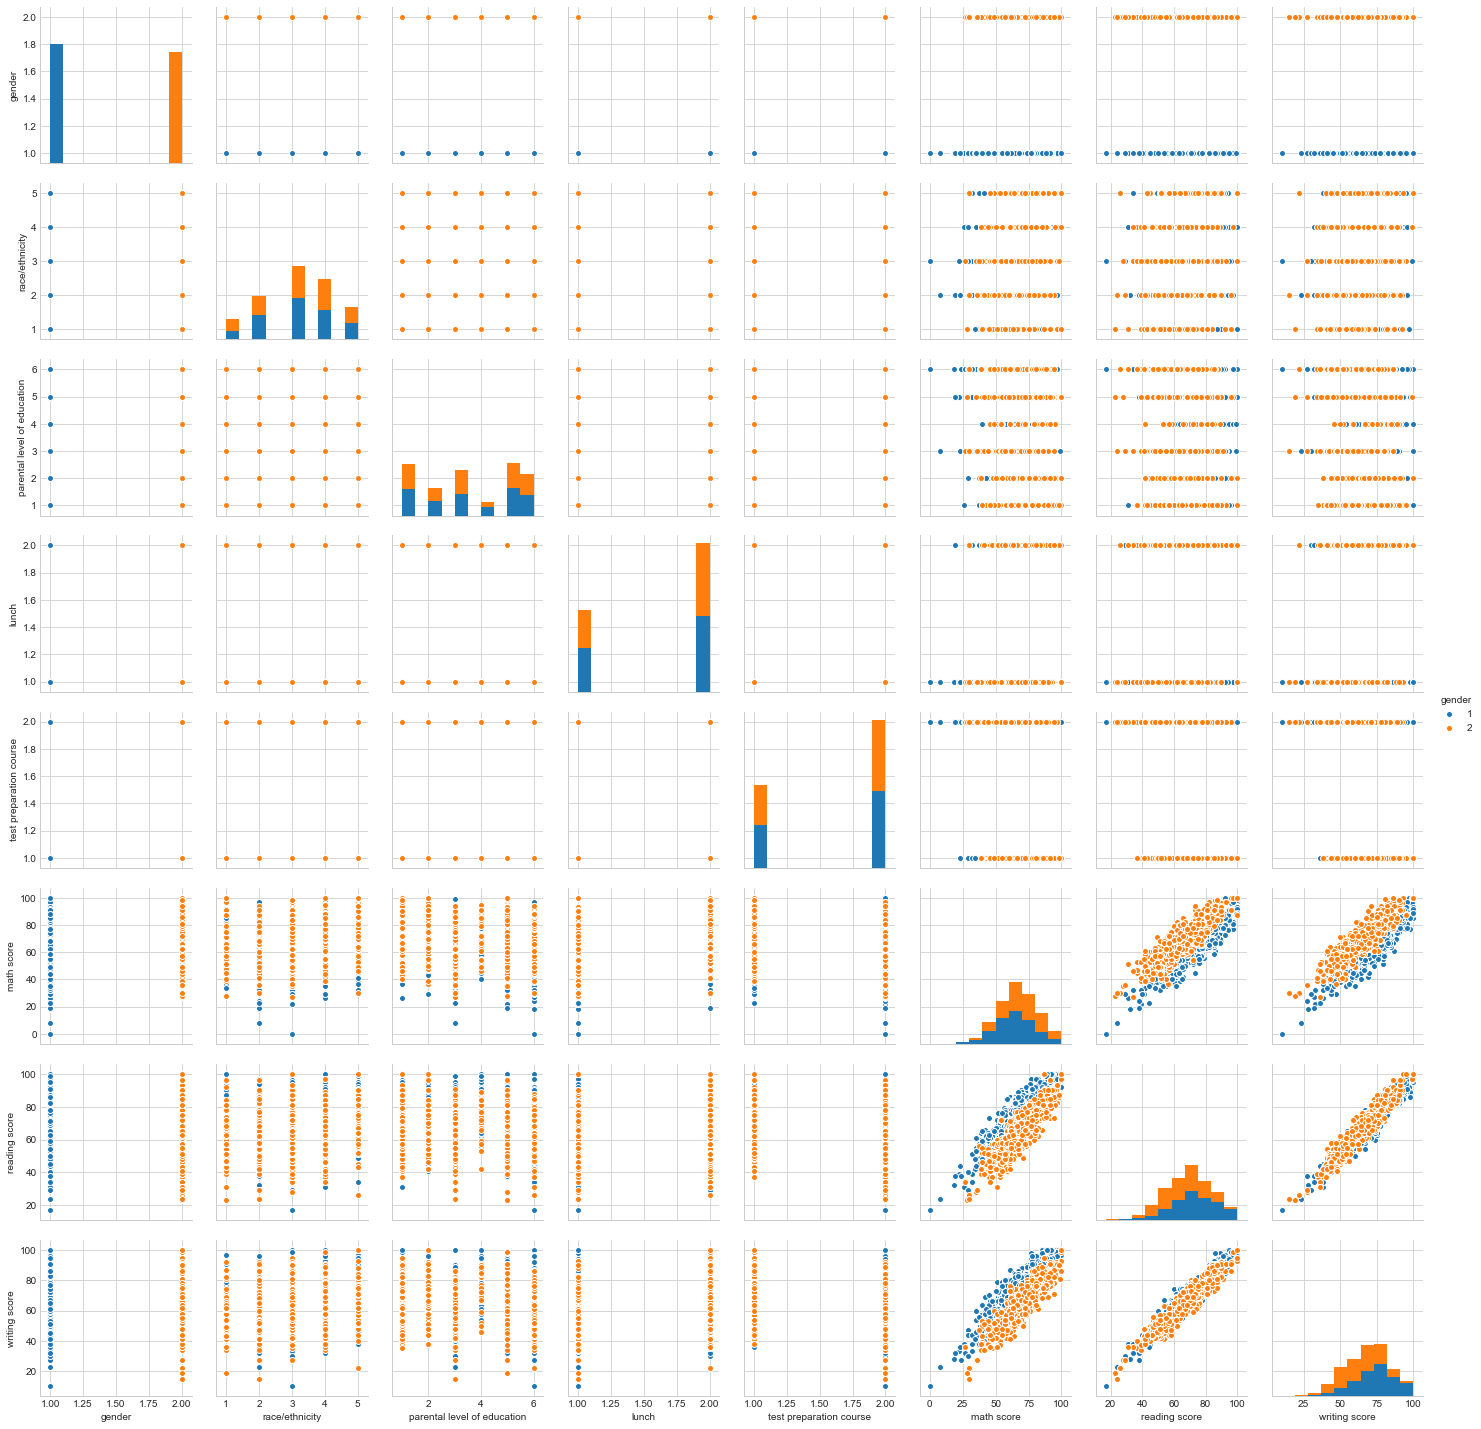

In [36]:
sns.set_style('whitegrid');
sns.pairplot(student,hue='gender');
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

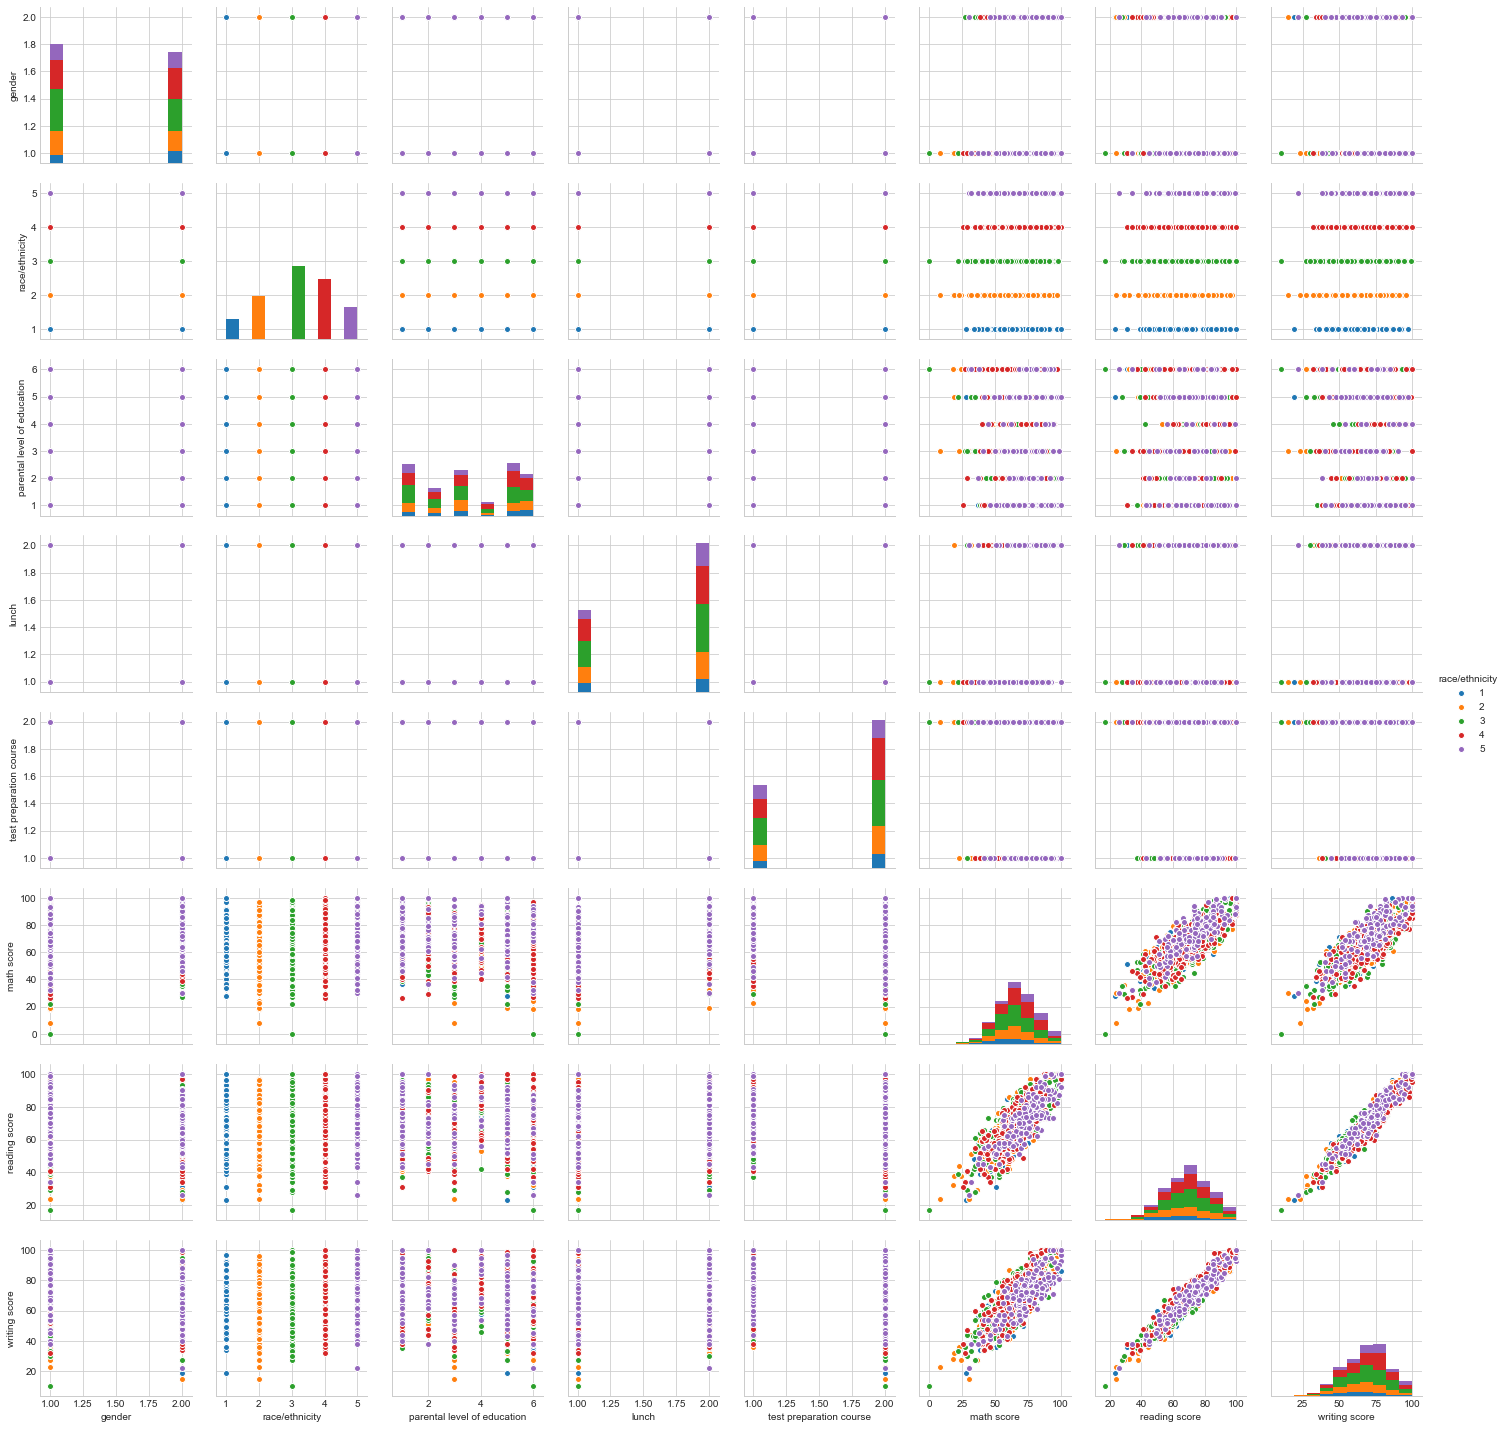

In [37]:
sns.set_style('whitegrid');
sns.pairplot(student,hue='race/ethnicity');
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

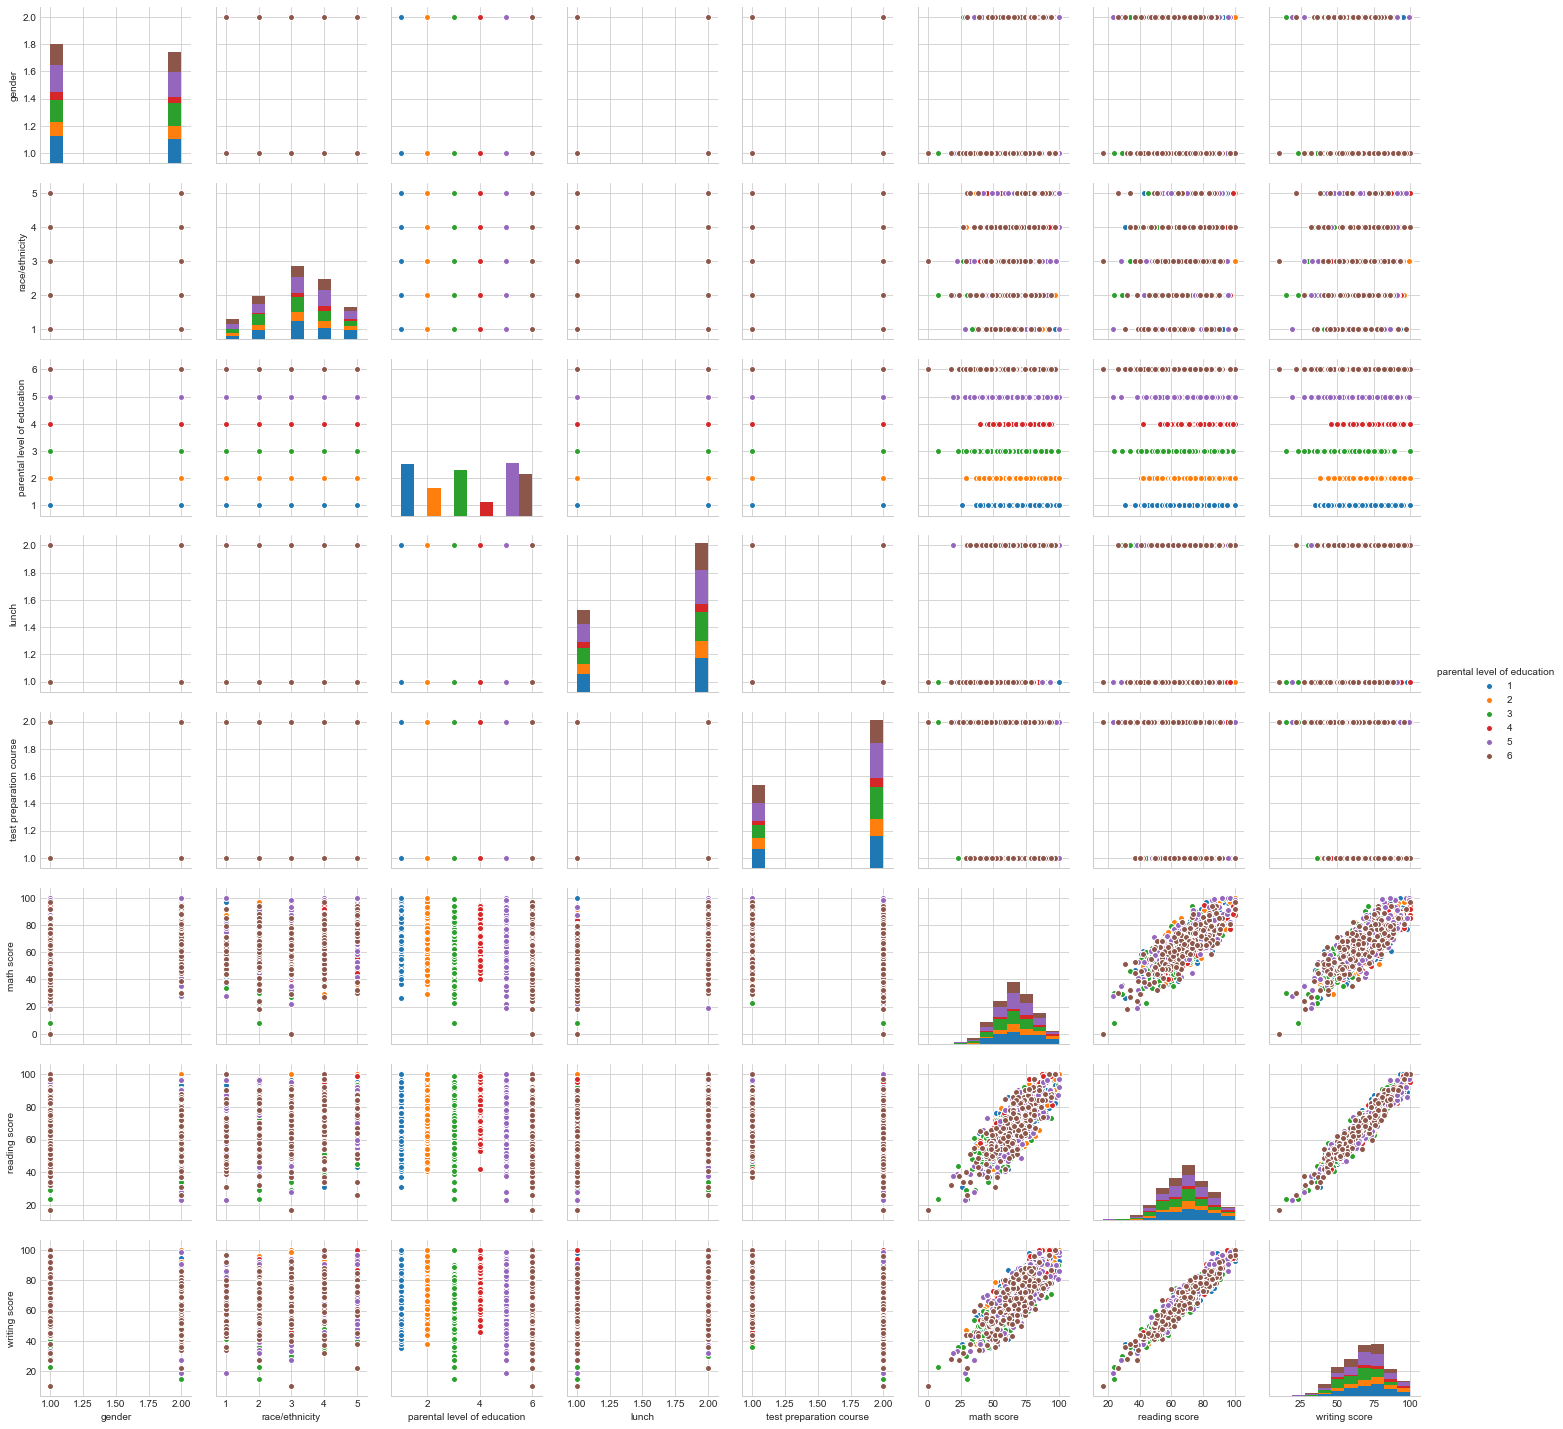

In [38]:
sns.set_style('whitegrid');
sns.pairplot(student,hue='parental level of education');
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

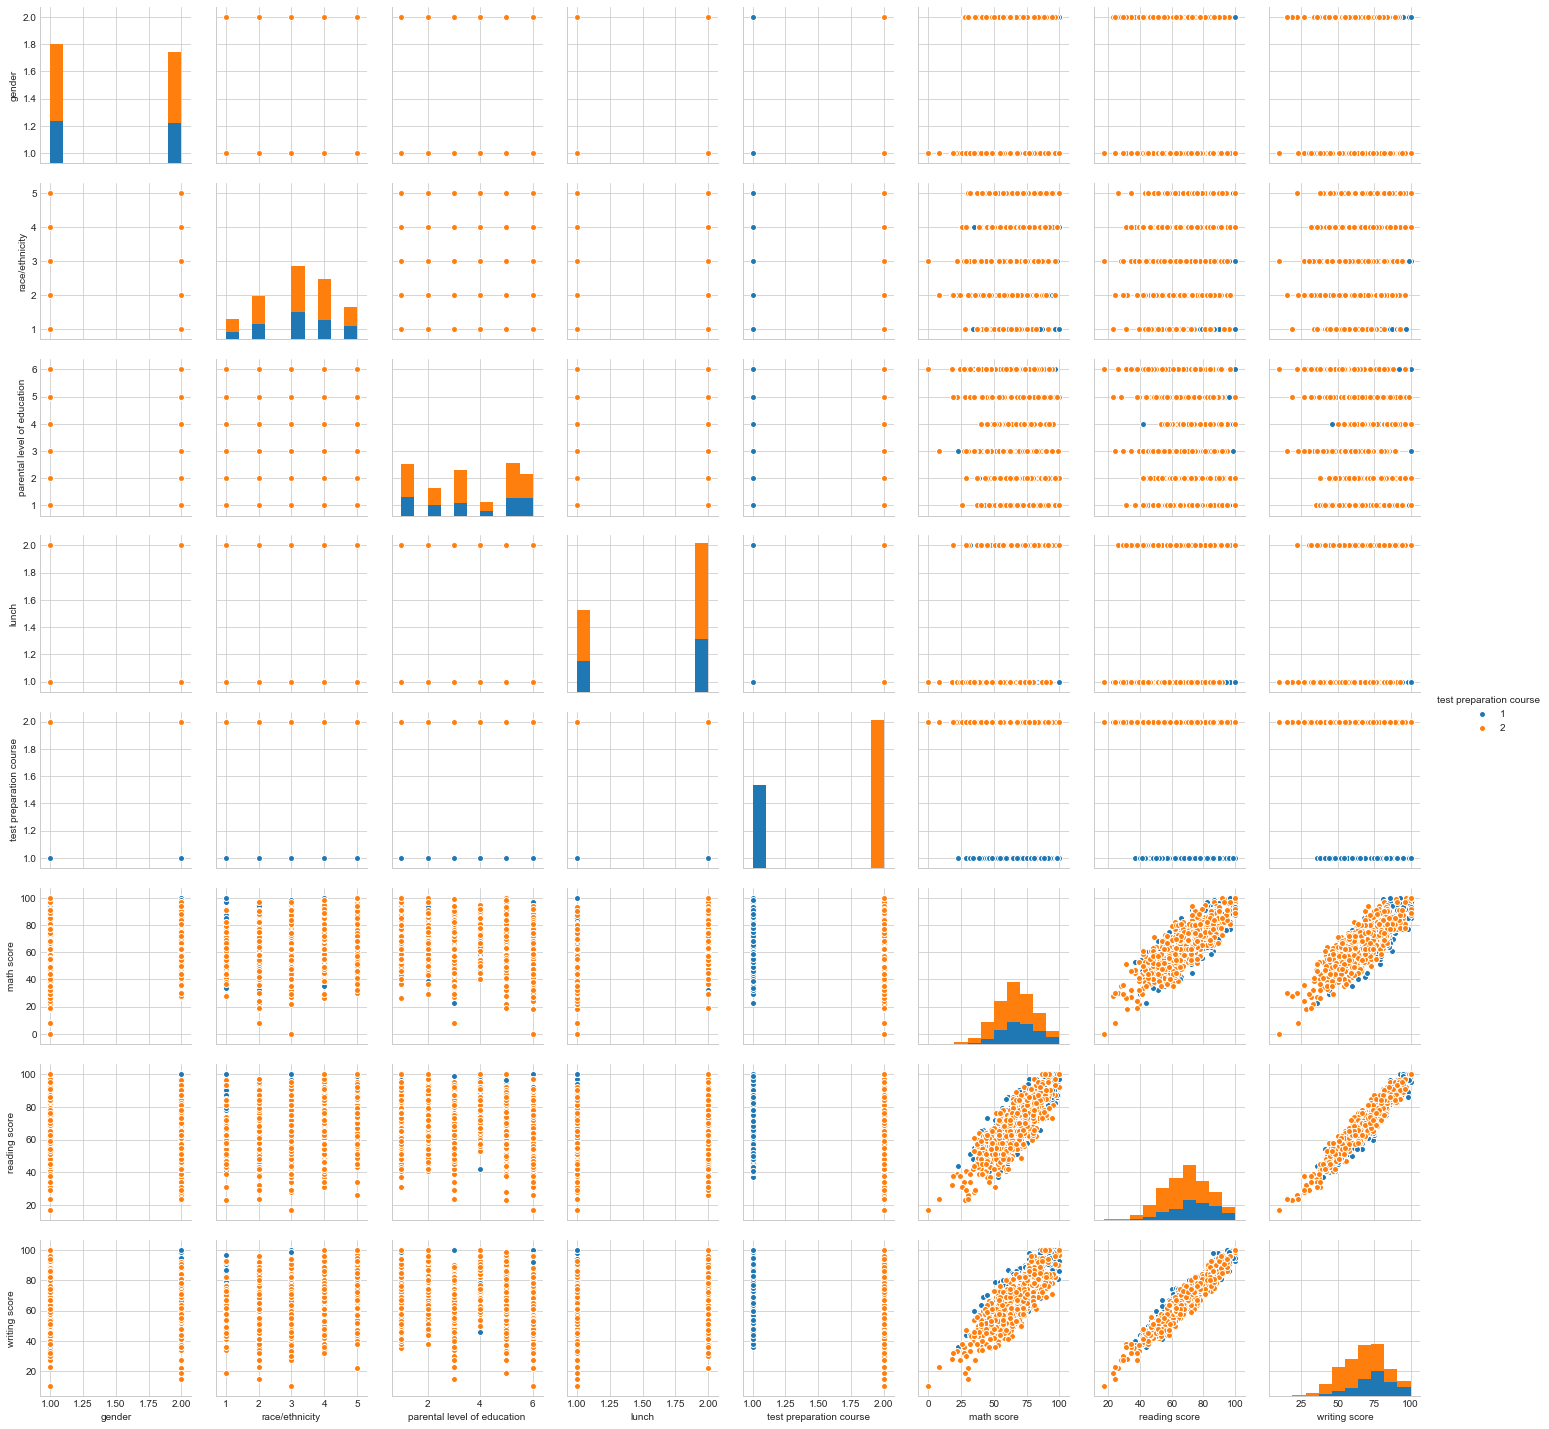

In [39]:
sns.set_style('whitegrid');
sns.pairplot(student,hue='test preparation course');
plt.show

In [ ]:
#tested with scatter plots but it is very inconclusive because we have a huge number of data points hence we will try bar plots

C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

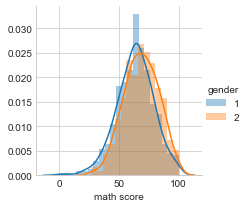

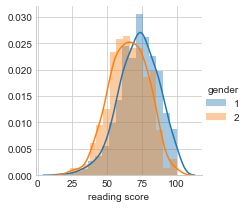

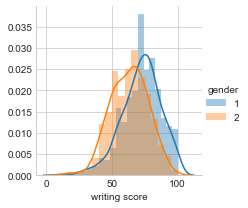

In [45]:
sns.FacetGrid(student,hue='gender') \
   .map(sns.distplot,'math score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='gender') \
   .map(sns.distplot,'reading score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='gender') \
   .map(sns.distplot,'writing score') \
   .add_legend();
plt.show

C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

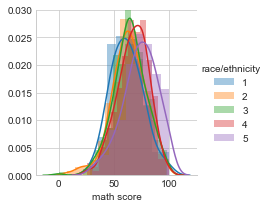

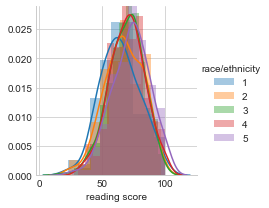

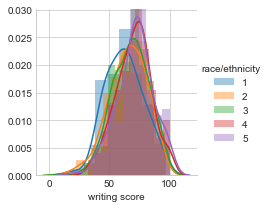

In [46]:
sns.FacetGrid(student,hue='race/ethnicity') \
   .map(sns.distplot,'math score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='race/ethnicity') \
   .map(sns.distplot,'reading score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='race/ethnicity') \
   .map(sns.distplot,'writing score') \
   .add_legend();
plt.show

C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

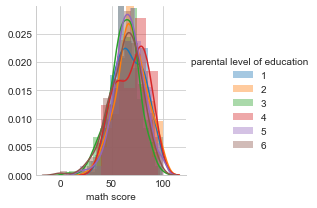

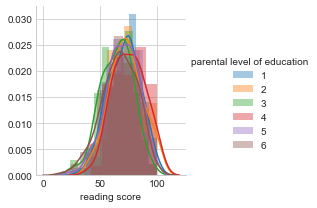

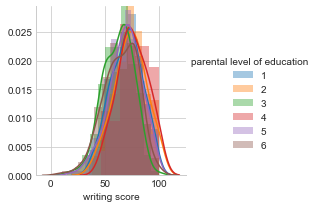

In [47]:
sns.FacetGrid(student,hue='parental level of education') \
   .map(sns.distplot,'math score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='parental level of education') \
   .map(sns.distplot,'reading score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='parental level of education') \
   .map(sns.distplot,'writing score') \
   .add_legend();
plt.show

C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Siddhisa\Anaconda3\lib\site-packages\matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

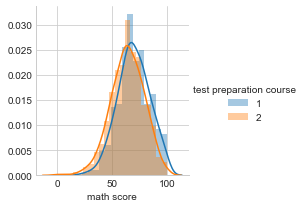

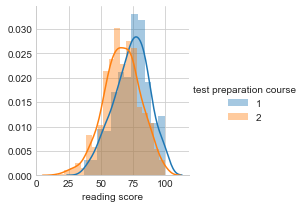

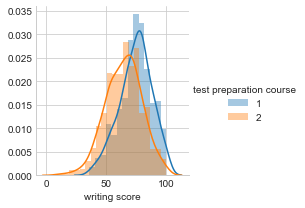

In [49]:
sns.FacetGrid(student,hue='test preparation course') \
   .map(sns.distplot,'math score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='test preparation course') \
   .map(sns.distplot,'reading score') \
   .add_legend();
plt.show
sns.FacetGrid(student,hue='test preparation course') \
   .map(sns.distplot,'writing score') \
   .add_legend();
plt.show

In [51]:
student['mean score'] = np.mean(np.array(student[["math score", "reading score", "writing score"]]), axis=1, dtype=np.int64)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(
    student[['test preparation course', 'race/ethnicity', 'lunch']].values,
    student['mean score'].values, test_size=0.2, random_state=42)